# Exploratory Data Analysis - Excercise

<hr>

*This notebook contains an excercise on exploratory data analysis (EDA) that aims to assess the assess understanding gained from the EDA tutorial.*

The exercise is organised in 6 parts:
1. Data Loading & Descriptive Statistics
2. Handling Missing Values
3. Categorical Features Encoding
4. Data Scaling (Standardization and Normalization)
5. Feature Engineering
6. Data Analysis

For each part you will have to write **your own code** in the code cells marked with a comment (`# YOUR CODE HERE`). Also, write a short summary explaining what have you done and why, and what can be concluded of it in the markdown cells marked with **"Summary & Key Takeaways:** (Insert here)**"**

***Note**: You can split the code for one part in multiple cells for better organization.*

Example code cell:

In [40]:
# YOUR CODE HERE

Example markdown cell:

**Summary & Key Takeaways:** (Insert here)

## Dataset
<hr>

For the purpose of this tutorial a modified version of the World Energy Consumption dataset will be used.

This dataset  dataset is a collection of key metrics maintained by Our World in Data. It is updated regularly and includes data on energy consumption (primary energy, per capita, and growth rates), energy mix, electricity mix and other relevant metrics. It contains data for multiple countries over the span of multiple years. 

- The dataset is publicly available and can be downloaded from [**Kaggle**](https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption/data)
- Refer to [**this codebook**](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv) for detailed description of the columns of the dataset

The modified version of the dataset contains **5 countries** from the year of **1990 to 2022.** The included countries are: United States, China, United Kingdom, India and Germany. The data keeps track of 7 different energy sources, specifically, the **consumption** and the **generation** of energy through these sources and also the **share** of each source in **total energy consumption and generation.** 
<br>

The sources include: biofuel, coal, gas, hydro, oil, solar, wind. The fuels are grouped into **fossil fuels** (coal, oil, gas) and **renewable fuels** (biofuel, hydro, solar, wind)<br> 
Additionally, for each country there is information about:
- Population
- GDP
- Electricity Demand
- Electricity Generation
- Carbon Intensity of Electricity Generation 
- Net Electric Imports
- Greenhouse Gas Emissions
- Primary Energy Consumption

<br>

## 1. Data Loading & Descriptive Statistics
<hr>

***Task**: Load the dataset using `pandas` library that you received (placed in the same directory as this notebook). Explore the data by using descriptive statistics.*

In [41]:
# YOUR CODE HERE
import pandas as pd  # Za da moze da rabotime so csv dokumentot, mora da ja dodademe bibliotekata pandas

In [42]:
df1 = pd.read_csv(r"C:\Users\Lenovo\Desktop\FEIT\6 Semestar\Podatocna nauka i analiza na podatoci\PNAP LABS\PNAP 1 LAB\owid-energy-codebook.csv")
# So pomos na pd.read_csv funkcijata moze da pristapime do tabelata vo dokumentot owid-energy-codebook.csv
df1

,column,description,unit,source
0,country,Country - Geographic location.,NaN,Our World in Data - Regions (2022)
1,year,Year - Year of observation.,NaN,Our World in Data - Regions (2022)
2,iso_code,ISO code - ISO 3166-1 alpha-3 three-letter cou...,NaN,International Organization for Standardization...
3,population,"Population - Population by country, available ...",persons,Population based on various sources (2023) [ht...
4,gdp,GDP - Gross domestic product measured in inter...,international-$ in 2011 prices,Maddison Project Database 2020 (Bolt and van Z...
...,...,...,...,...
124,wind_elec_per_capita,Electricity generation from wind power per per...,kilowatt-hours,Ember - Yearly Electricity Data (2023) [https:...
125,wind_electricity,Electricity generation from wind power - Measu...,terawatt-hours,Ember - Yearly Electricity Data (2023) [https:...
126,wind_energy_per_capita,Wind power consumption per capita - Measured i...,kilowatt-hours,Energy Institute - Statistical Review of World...
127,wind_share_elec,Share of electricity generated by wind power -...,%,Ember - Yearly Electricity Data (2023) [https:...


In [43]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\FEIT\6 Semestar\Podatocna nauka i analiza na podatoci\PNAP LABS\PNAP 1 LAB\owid-energy-data-modified_v2.csv")
df

,country,year,population,gdp,electricity_demand,electricity_generation,electricity_share_energy,carbon_intensity_elec,greenhouse_gas_emissions,net_elec_imports,...,solar_consumption,solar_electricity,solar_share_elec,solar_share_energy,wind_consumption,wind_electricity,wind_share_elec,wind_share_energy,continent,status
0,China,1991,1.170626e+09,3.508948e+12,NaN,677.55,8.372,NaN,NaN,NaN,...,0.006,0.002,0.000,0.000,0.027,0.009,0.001,0.000,Asia,High-Income
1,China,1992,1.183813e+09,3.755037e+12,NaN,753.94,8.852,NaN,NaN,NaN,...,0.009,0.003,0.000,0.000,0.388,0.131,0.017,0.004,Asia,High-Income
2,China,1993,1.195856e+09,4.126170e+12,NaN,811.59,8.863,NaN,NaN,NaN,...,0.012,0.004,0.000,0.000,0.627,0.212,0.026,0.007,Asia,High-Income
3,China,1994,1.207287e+09,4.438753e+12,NaN,927.80,9.573,NaN,NaN,NaN,...,0.015,0.005,0.001,0.000,1.135,0.384,0.041,0.011,Asia,High-Income
4,China,1995,1.218144e+09,4.810000e+12,NaN,1007.03,10.123,NaN,NaN,NaN,...,0.021,0.007,0.001,0.000,1.822,0.616,0.061,0.018,Asia,High-Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,United States,2018,3.321400e+08,1.814065e+13,4246.01,4201.55,17.395,412.062,1731.30,44.46,...,249.513,93.360,2.222,0.932,728.691,272.670,6.490,2.723,North America,High-Income
156,United States,2019,3.343197e+08,NaN,4197.42,4158.38,17.377,392.776,1633.31,39.04,...,284.616,106.890,2.570,1.071,787.816,295.880,7.115,2.965,North America,High-Income
157,United States,2020,3.359420e+08,NaN,4090.49,4043.18,18.456,369.392,1493.52,47.31,...,346.779,130.720,3.233,1.409,896.488,337.940,8.358,3.644,North America,High-Income
158,United States,2021,3.369976e+08,NaN,4192.93,4153.62,17.892,379.260,1575.30,39.31,...,434.585,164.420,3.958,1.675,999.615,378.200,9.105,3.853,North America,High-Income


In [44]:
df.shape # Ovaa funkcija vrakja tuple od dve vrednosti, prvata vrednost e broj na redici a vtorata vrednost e broj na koloni

(160, 53)

In [45]:
df.head()  # Funkcija koja gi prikazuva prvite 5 redici

,country,year,population,gdp,electricity_demand,electricity_generation,electricity_share_energy,carbon_intensity_elec,greenhouse_gas_emissions,net_elec_imports,...,solar_consumption,solar_electricity,solar_share_elec,solar_share_energy,wind_consumption,wind_electricity,wind_share_elec,wind_share_energy,continent,status
0,China,1991,1.170626e+09,3.508948e+12,NaN,677.55,8.372,NaN,NaN,NaN,...,0.006,0.002,0.000,0.0,0.027,0.009,0.001,0.000,Asia,High-Income
1,China,1992,1.183813e+09,3.755037e+12,NaN,753.94,8.852,NaN,NaN,NaN,...,0.009,0.003,0.000,0.0,0.388,0.131,0.017,0.004,Asia,High-Income
2,China,1993,1.195856e+09,4.126170e+12,NaN,811.59,8.863,NaN,NaN,NaN,...,0.012,0.004,0.000,0.0,0.627,0.212,0.026,0.007,Asia,High-Income
3,China,1994,1.207287e+09,4.438753e+12,NaN,927.80,9.573,NaN,NaN,NaN,...,0.015,0.005,0.001,0.0,1.135,0.384,0.041,0.011,Asia,High-Income
4,China,1995,1.218144e+09,4.810000e+12,NaN,1007.03,10.123,NaN,NaN,NaN,...,0.021,0.007,0.001,0.0,1.822,0.616,0.061,0.018,Asia,High-Income


In [46]:
df.info() # Ovaa funkcija dava informacii za tipovi na podatoci, iminja na koloni

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     160 non-null    object 
 1   year                        160 non-null    int64  
 2   population                  160 non-null    float64
 3   gdp                         140 non-null    float64
 4   electricity_demand          133 non-null    float64
 5   electricity_generation      160 non-null    float64
 6   electricity_share_energy    160 non-null    float64
 7   carbon_intensity_elec       115 non-null    float64
 8   greenhouse_gas_emissions    115 non-null    float64
 9   net_elec_imports            133 non-null    float64
 10  primary_energy_consumption  160 non-null    float64
 11  biofuel_consumption         131 non-null    float64
 12  biofuel_electricity         133 non-null    float64
 13  biofuel_share_elec          133 non

In [47]:
df.describe() # Za sekoja kolona vrakja opredelena statisticka vrednost kako min max mean i slicno.

,year,population,gdp,electricity_demand,electricity_generation,electricity_share_energy,carbon_intensity_elec,greenhouse_gas_emissions,net_elec_imports,primary_energy_consumption,...,renewables_share_elec,renewables_share_energy,solar_consumption,solar_electricity,solar_share_elec,solar_share_energy,wind_consumption,wind_electricity,wind_share_elec,wind_share_energy
count,160.000000,1.600000e+02,1.400000e+02,133.000000,160.000000,160.000000,115.000000,115.000000,133.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,2006.500000,5.860269e+08,6.548117e+12,1930.461128,1880.927437,16.156731,522.559643,1174.263217,4.218271,12274.882994,...,15.687006,7.117119,59.413544,22.324262,1.128100,0.499394,167.972181,62.711794,3.791088,1.637875
std,9.262082,5.529928e+08,5.219688e+12,2058.017682,1959.771580,2.433993,111.218972,1180.967094,21.759774,11647.575318,...,9.477988,4.576911,152.960102,58.326361,2.072213,0.911938,310.373866,117.786842,5.596828,2.370753
min,1991.000000,5.735945e+07,1.487461e+12,320.760000,308.650000,8.372000,248.670000,77.590000,-52.460000,1973.261000,...,1.626000,0.610000,0.000000,0.000000,0.000000,0.000000,0.027000,0.009000,0.001000,0.000000
25%,1998.750000,8.121616e+07,2.392943e+12,527.550000,518.137000,15.117500,464.813500,272.785000,-8.600000,3440.041750,...,9.217750,4.259500,0.032500,0.010000,0.002000,0.001000,4.395250,1.546500,0.162000,0.062750
50%,2006.500000,3.012482e+08,3.745228e+12,613.180000,724.475000,16.302500,513.756000,646.970000,2.160000,5056.415500,...,15.487500,6.590000,1.542000,0.516000,0.014000,0.007000,40.786500,14.260000,1.407500,0.611500
75%,2014.250000,1.224805e+09,1.039622e+13,3865.210000,3676.199500,17.589750,637.410000,1926.550000,16.410000,25063.352500,...,19.492500,8.959500,33.282250,12.210000,1.234000,0.525250,167.238000,63.442500,4.750500,2.198500
max,2022.000000,1.425894e+09,1.815162e+13,8831.030000,8848.730000,22.542000,679.410000,4725.070000,66.670000,44275.914000,...,44.441000,21.258000,1115.113000,427.720000,10.706000,4.639000,1988.450000,762.700000,24.613000,10.286000


In [48]:
df.dtypes # Za sekoja kolona kazuva kakov tip na podatok cuva

country                        object
year                            int64
population                    float64
gdp                           float64
electricity_demand            float64
electricity_generation        float64
electricity_share_energy      float64
carbon_intensity_elec         float64
greenhouse_gas_emissions      float64
net_elec_imports              float64
primary_energy_consumption    float64
biofuel_consumption           float64
biofuel_electricity           float64
biofuel_share_elec            float64
biofuel_share_energy          float64
coal_consumption              float64
coal_electricity              float64
coal_share_elec               float64
coal_share_energy             float64
fossil_electricity            float64
fossil_fuel_consumption       float64
fossil_share_elec             float64
fossil_share_energy           float64
gas_consumption               float64
gas_electricity               float64
gas_share_elec                float64
gas_share_en

**Summary & Key Takeaways:** (Insert here)

<br>

## 2. Handling Missing Values
<hr>

***Task**: Examine the dataset for any missing values. If any are found, handle them with the method you think is most suitable.*

In [49]:
# YOUR CODE HERE
df.isnull().sum() # Vrakja broj na missing values vo sekoja kolona
                  # Moze da primetime deka vo kolonite kako gdp, electricity_demand, carbon_intensity_elec, greenhouse_gas_emissions,
                  # net_elec_imports, biofuel_consumption, biofuel_electricity, biofuel_share_elec i biofuel_share_energy  falat vrednosti.                  

country                        0
year                           0
population                     0
gdp                           20
electricity_demand            27
electricity_generation         0
electricity_share_energy       0
carbon_intensity_elec         45
greenhouse_gas_emissions      45
net_elec_imports              27
primary_energy_consumption     0
biofuel_consumption           29
biofuel_electricity           27
biofuel_share_elec            27
biofuel_share_energy          29
coal_consumption               0
coal_electricity               0
coal_share_elec                0
coal_share_energy              0
fossil_electricity             0
fossil_fuel_consumption        0
fossil_share_elec              0
fossil_share_energy            0
gas_consumption                0
gas_electricity                0
gas_share_elec                 0
gas_share_energy               0
hydro_consumption              0
hydro_electricity              0
hydro_share_elec               0
hydro_shar

In [50]:
df.ffill(inplace=True) # Missing values da se popolnat so prethodno poznata i validna vrednost
df.bfill(inplace=True) # So ovaa funkcija se popolnuvaat slednite missing values koristejki ja slednata poznnata i validna vrednost
df.fillna(0, inplace=True) # Dokolku ostanat uste nekoi missing values, tie da se popolnat so nula
df

,country,year,population,gdp,electricity_demand,electricity_generation,electricity_share_energy,carbon_intensity_elec,greenhouse_gas_emissions,net_elec_imports,...,solar_consumption,solar_electricity,solar_share_elec,solar_share_energy,wind_consumption,wind_electricity,wind_share_elec,wind_share_energy,continent,status
0,China,1991,1.170626e+09,3.508948e+12,1346.85,677.55,8.372,672.367,911.46,-8.75,...,0.006,0.002,0.000,0.000,0.027,0.009,0.001,0.000,Asia,High-Income
1,China,1992,1.183813e+09,3.755037e+12,1346.85,753.94,8.852,672.367,911.46,-8.75,...,0.009,0.003,0.000,0.000,0.388,0.131,0.017,0.004,Asia,High-Income
2,China,1993,1.195856e+09,4.126170e+12,1346.85,811.59,8.863,672.367,911.46,-8.75,...,0.012,0.004,0.000,0.000,0.627,0.212,0.026,0.007,Asia,High-Income
3,China,1994,1.207287e+09,4.438753e+12,1346.85,927.80,9.573,672.367,911.46,-8.75,...,0.015,0.005,0.001,0.000,1.135,0.384,0.041,0.011,Asia,High-Income
4,China,1995,1.218144e+09,4.810000e+12,1346.85,1007.03,10.123,672.367,911.46,-8.75,...,0.021,0.007,0.001,0.000,1.822,0.616,0.061,0.018,Asia,High-Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,United States,2018,3.321400e+08,1.814065e+13,4246.01,4201.55,17.395,412.062,1731.30,44.46,...,249.513,93.360,2.222,0.932,728.691,272.670,6.490,2.723,North America,High-Income
156,United States,2019,3.343197e+08,1.814065e+13,4197.42,4158.38,17.377,392.776,1633.31,39.04,...,284.616,106.890,2.570,1.071,787.816,295.880,7.115,2.965,North America,High-Income
157,United States,2020,3.359420e+08,1.814065e+13,4090.49,4043.18,18.456,369.392,1493.52,47.31,...,346.779,130.720,3.233,1.409,896.488,337.940,8.358,3.644,North America,High-Income
158,United States,2021,3.369976e+08,1.814065e+13,4192.93,4153.62,17.892,379.260,1575.30,39.31,...,434.585,164.420,3.958,1.675,999.615,378.200,9.105,3.853,North America,High-Income


**Summary & Key Takeaways:** (Insert here)

<br>

## 3. Categorical Feature Encoding
<hr>

***Task**: Encode the categorical features in your dataset. Ignore the `country` feature.*

In [51]:
# YOUR CODE HERE
# Vo ovoj dataset moze da se napravi categorical feature encoding na poslednite dve koloni: continent i status.

In [52]:
continenti = df['continent'].unique() # Vo lista da se stavat site kontinenti koi gi ima vo kolonata continent
print(continenti) # Istite da se ispecatat


['Asia' 'Europe' 'North America']


In [53]:
# Bidejki Asia, Europe i North America ne mozat da se podredat od najmalo do najgolemo, se koristi One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['continent']) # Kolonata continent ke bide smeneta so 4 koloni, za sekoj kontinent posebna kolona
df_encoded


,country,year,population,gdp,electricity_demand,electricity_generation,electricity_share_energy,carbon_intensity_elec,greenhouse_gas_emissions,net_elec_imports,...,solar_share_elec,solar_share_energy,wind_consumption,wind_electricity,wind_share_elec,wind_share_energy,status,continent_Asia,continent_Europe,continent_North America
0,China,1991,1.170626e+09,3.508948e+12,1346.85,677.55,8.372,672.367,911.46,-8.75,...,0.000,0.000,0.027,0.009,0.001,0.000,High-Income,True,False,False
1,China,1992,1.183813e+09,3.755037e+12,1346.85,753.94,8.852,672.367,911.46,-8.75,...,0.000,0.000,0.388,0.131,0.017,0.004,High-Income,True,False,False
2,China,1993,1.195856e+09,4.126170e+12,1346.85,811.59,8.863,672.367,911.46,-8.75,...,0.000,0.000,0.627,0.212,0.026,0.007,High-Income,True,False,False
3,China,1994,1.207287e+09,4.438753e+12,1346.85,927.80,9.573,672.367,911.46,-8.75,...,0.001,0.000,1.135,0.384,0.041,0.011,High-Income,True,False,False
4,China,1995,1.218144e+09,4.810000e+12,1346.85,1007.03,10.123,672.367,911.46,-8.75,...,0.001,0.000,1.822,0.616,0.061,0.018,High-Income,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,United States,2018,3.321400e+08,1.814065e+13,4246.01,4201.55,17.395,412.062,1731.30,44.46,...,2.222,0.932,728.691,272.670,6.490,2.723,High-Income,False,False,True
156,United States,2019,3.343197e+08,1.814065e+13,4197.42,4158.38,17.377,392.776,1633.31,39.04,...,2.570,1.071,787.816,295.880,7.115,2.965,High-Income,False,False,True
157,United States,2020,3.359420e+08,1.814065e+13,4090.49,4043.18,18.456,369.392,1493.52,47.31,...,3.233,1.409,896.488,337.940,8.358,3.644,High-Income,False,False,True
158,United States,2021,3.369976e+08,1.814065e+13,4192.93,4153.62,17.892,379.260,1575.30,39.31,...,3.958,1.675,999.615,378.200,9.105,3.853,High-Income,False,False,True


In [54]:
df_new = pd.read_csv(r"C:\Users\Lenovo\Desktop\FEIT\6 Semestar\Podatocna nauka i analiza na podatoci\PNAP LABS\PNAP 1 LAB\owid-energy-data-modified_v2.csv")

s = df_new['status'].unique()
print(s)  

#Bidejki site redici za status se High-Income, ne treba da se pravi encoding

['High-Income']


**Summary & Key Takeaways:** (Insert here)

<br>

## 4. Data Scaling
<hr>

***Task:** Using `StandardScaler()` and `MinMaxScaler()` from `scikit-learn` perform data standardization and normalization. In the summary section explain what are both methods and what is their usage.*

### 4.1 Standardization

In [55]:
from sklearn.preprocessing import StandardScaler # Preku ovaa linija kod imame pristap do StandardScaler()

In [56]:
# YOUR CODE HERE
for_standardization = df.select_dtypes(include=['float64', 'int64']).columns # Se odvojuvaat samo kolonite koi imaat podatoci od
                                                                             # tip float i integer
                                                                                
scaler_standard = StandardScaler() 
df_standardized = df.copy() # Za da ne se pravi standardizacija direktno na df, se pravi kopija
df_standardized[for_standardization] = scaler_standard.fit_transform(df[for_standardization])
df_standardized


,country,year,population,gdp,electricity_demand,electricity_generation,electricity_share_energy,carbon_intensity_elec,greenhouse_gas_emissions,net_elec_imports,...,solar_consumption,solar_electricity,solar_share_elec,solar_share_energy,wind_consumption,wind_electricity,wind_share_elec,wind_share_energy,continent,status
0,China,-1.678744,1.060475,-0.631516,-0.197658,-0.615968,-3.208380,1.255363,-0.246620,-0.467301,...,-0.389605,-0.383915,-0.546103,-0.549338,-0.542805,-0.534013,-0.679311,-0.693036,Asia,High-Income
1,China,-1.570438,1.084396,-0.587234,-0.197658,-0.576866,-3.010554,1.255363,-0.246620,-0.467301,...,-0.389586,-0.383898,-0.546103,-0.549338,-0.541638,-0.532974,-0.676443,-0.691344,Asia,High-Income
2,China,-1.462132,1.106241,-0.520451,-0.197658,-0.547357,-3.006020,1.255363,-0.246620,-0.467301,...,-0.389566,-0.383880,-0.546103,-0.549338,-0.540866,-0.532284,-0.674830,-0.690074,Asia,High-Income
3,China,-1.353826,1.126977,-0.464203,-0.197658,-0.487873,-2.713403,1.255363,-0.246620,-0.467301,...,-0.389546,-0.383863,-0.545619,-0.549338,-0.539224,-0.530819,-0.672142,-0.688382,Asia,High-Income
4,China,-1.245520,1.146674,-0.397399,-0.197658,-0.447318,-2.486727,1.255363,-0.246620,-0.467301,...,-0.389507,-0.383829,-0.545619,-0.549338,-0.537003,-0.528843,-0.668557,-0.685420,Asia,High-Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,United States,1.245520,-0.460556,2.001375,1.303841,1.187847,0.510337,-0.827038,0.361037,2.036328,...,1.246706,1.221725,0.529547,0.475871,1.812264,1.788123,0.483736,0.459150,North America,High-Income
156,United States,1.353826,-0.456602,2.001375,1.278675,1.165750,0.502919,-0.981323,0.288408,1.781307,...,1.476918,1.454424,0.698011,0.628772,2.003358,1.985793,0.595757,0.561548,North America,High-Income
157,United States,1.462132,-0.453659,2.001375,1.223295,1.106783,0.947615,-1.168391,0.184797,2.170426,...,1.884594,1.864270,1.018963,1.000575,2.354590,2.344000,0.818544,0.848854,North America,High-Income
158,United States,1.570438,-0.451744,2.001375,1.276350,1.163313,0.715169,-1.089449,0.245411,1.794011,...,2.460442,2.443867,1.369929,1.293178,2.687900,2.686877,0.952432,0.937289,North America,High-Income


### 4.2 Normalization

In [57]:
from sklearn.preprocessing import MinMaxScaler # Preku ovaa linija kod imame pristap do MinMaxScaler()

In [58]:
# YOUR CODE HERE
for_Normalization = df.select_dtypes(include=['float64', 'int64']).columns 
                                                                            
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[for_Normalization] = scaler_minmax.fit_transform(df[for_Normalization])
df_normalized

,country,year,population,gdp,electricity_demand,electricity_generation,electricity_share_energy,carbon_intensity_elec,greenhouse_gas_emissions,net_elec_imports,...,solar_consumption,solar_electricity,solar_share_elec,solar_share_energy,wind_consumption,wind_electricity,wind_share_elec,wind_share_energy,continent,status
0,China,0.000000,0.813474,0.121307,0.120571,0.043196,0.000000,0.983649,0.179424,0.366910,...,0.000005,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Asia,High-Income
1,China,0.032258,0.823110,0.136075,0.120571,0.052141,0.033874,0.983649,0.179424,0.366910,...,0.000008,0.000007,0.000000,0.000000,0.000182,0.000160,0.000650,0.000389,Asia,High-Income
2,China,0.064516,0.831909,0.158346,0.120571,0.058892,0.034651,0.983649,0.179424,0.366910,...,0.000011,0.000009,0.000000,0.000000,0.000302,0.000266,0.001016,0.000681,Asia,High-Income
3,China,0.096774,0.840262,0.177104,0.120571,0.072499,0.084757,0.983649,0.179424,0.366910,...,0.000013,0.000012,0.000093,0.000000,0.000557,0.000492,0.001625,0.001069,Asia,High-Income
4,China,0.129032,0.848196,0.199382,0.120571,0.081777,0.123571,0.983649,0.179424,0.366910,...,0.000019,0.000016,0.000093,0.000000,0.000903,0.000796,0.002438,0.001750,Asia,High-Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,United States,0.870968,0.200785,0.999341,0.461237,0.455839,0.636768,0.379329,0.355829,0.813565,...,0.223756,0.218274,0.207547,0.200905,0.366453,0.357499,0.263652,0.264729,North America,High-Income
156,United States,0.903226,0.202377,0.999341,0.455527,0.450784,0.635498,0.334554,0.334745,0.768068,...,0.255235,0.249906,0.240052,0.230869,0.396188,0.387930,0.289046,0.288256,North America,High-Income
157,United States,0.935484,0.203563,0.999341,0.442962,0.437294,0.711644,0.280267,0.304666,0.837488,...,0.310981,0.305620,0.301980,0.303729,0.450840,0.443077,0.339550,0.354268,North America,High-Income
158,United States,0.967742,0.204334,0.999341,0.455000,0.450226,0.671842,0.303176,0.322263,0.770335,...,0.389723,0.384410,0.369699,0.361069,0.502704,0.495864,0.369901,0.374587,North America,High-Income


**Summary & Key Takeaways:** (Insert here)

<br>

## 5. Feature Engineering
<hr>

***Task:** Create a new feature from the existing features in the dataset. The minimum number of new features is 1. Examine how your new features are correlated to the others. Write a summary about your new features.*

In [ ]:
# YOUR CODE HERE
df_copy = df.copy()
df_copy['energy_per_person'] = df['electricity_generation'] / df['population'] # Kreiranje na nova kolona vo dataset-ot
print(df_copy.columns) # Moze da vidime deka dodadena e novata kolona

Index(['country', 'year', 'population', 'gdp', 'electricity_demand',
       'electricity_generation', 'electricity_share_energy',
       'carbon_intensity_elec', 'greenhouse_gas_emissions', 'net_elec_imports',
       'primary_energy_consumption', 'biofuel_consumption',
       'biofuel_electricity', 'biofuel_share_elec', 'biofuel_share_energy',
       'coal_consumption', 'coal_electricity', 'coal_share_elec',
       'coal_share_energy', 'fossil_electricity', 'fossil_fuel_consumption',
       'fossil_share_elec', 'fossil_share_energy', 'gas_consumption',
       'gas_electricity', 'gas_share_elec', 'gas_share_energy',
       'hydro_consumption', 'hydro_electricity', 'hydro_share_elec',
       'hydro_share_energy', 'nuclear_consumption', 'nuclear_electricity',
       'nuclear_share_elec', 'nuclear_share_energy', 'oil_consumption',
       'oil_electricity', 'oil_share_elec', 'oil_share_energy',
       'renewables_consumption', 'renewables_electricity',
       'renewables_share_elec', 'renew

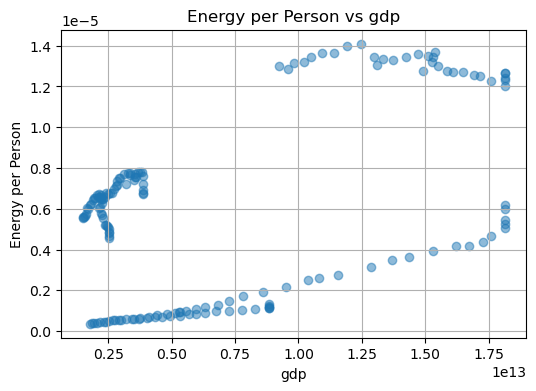

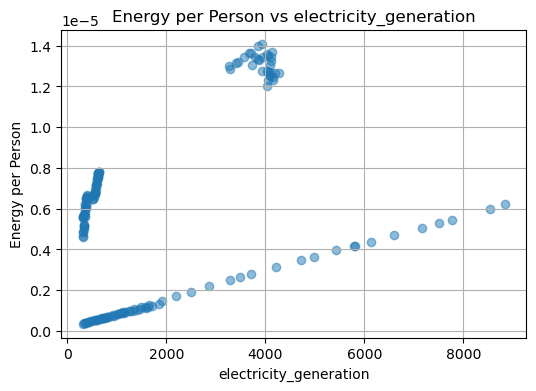

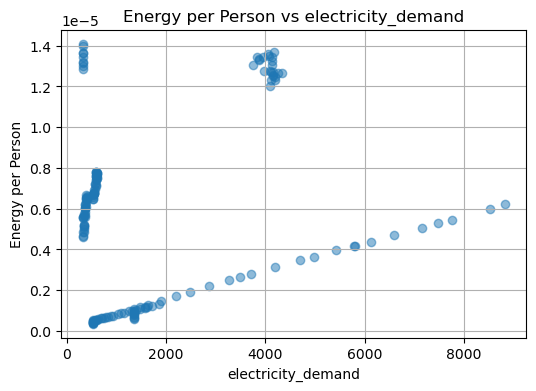

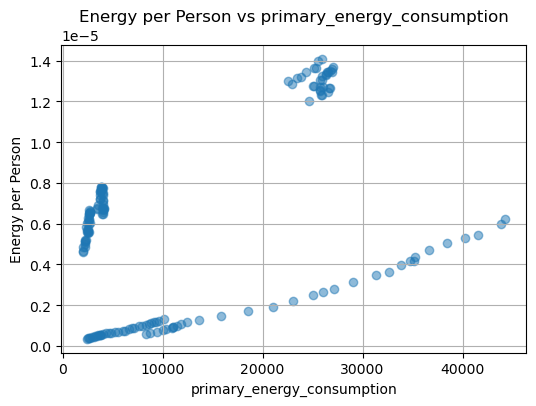

In [79]:
features_to_plot = ['gdp', 'electricity_generation', 'electricity_demand', 'primary_energy_consumption']

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_copy[feature], df_copy['energy_per_person'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Energy per Person')
    plt.title(f'Energy per Person vs {feature}')
    plt.grid(True)
    plt.show()


**Summary & Key Takeaways:** (Insert here)

<br>

## 6. Data Analysis
<hr>

This section refers to performing various data analysis tasks, split into multiple subtasks. It involves analyzing trends, correlations, patterns and deriving insights from the data.

You can use the engineered features for the analysis or create new ones if needed. For better understanding of the dataset columns please refer to the [**above-mentioned codebook**](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv).

### 6.1 Trend Analysis
<hr>

***Task 1**: Plot the trend of electricity generation over the years for each of the five countries*

In [60]:
# YOUR CODE HERE
c = df['country'].unique() 
print(c)

['China' 'Germany' 'India' 'United Kingdom' 'United States']


In [61]:
import matplotlib.pyplot as plt

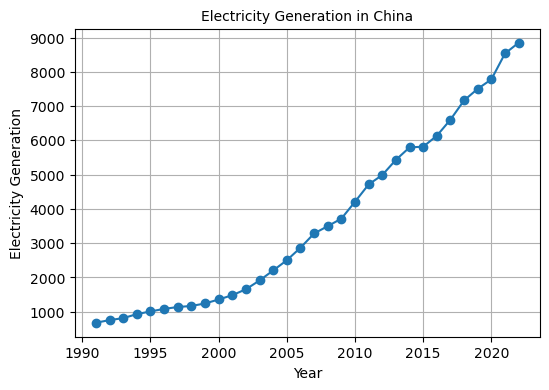

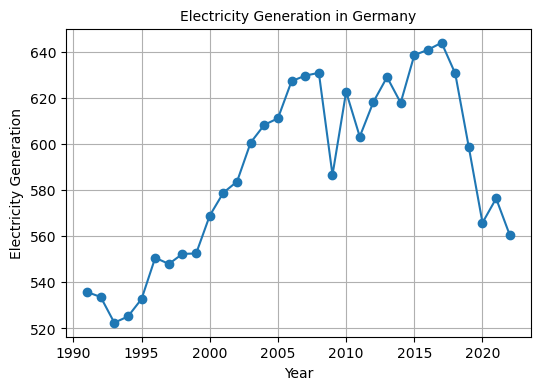

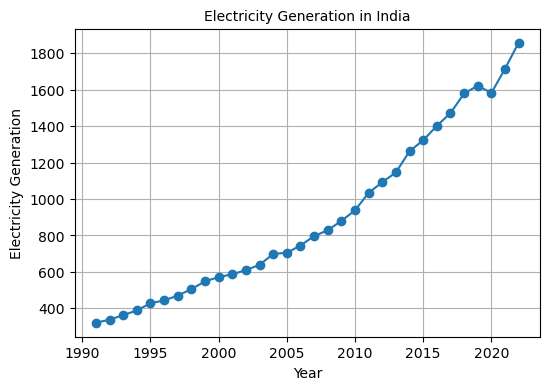

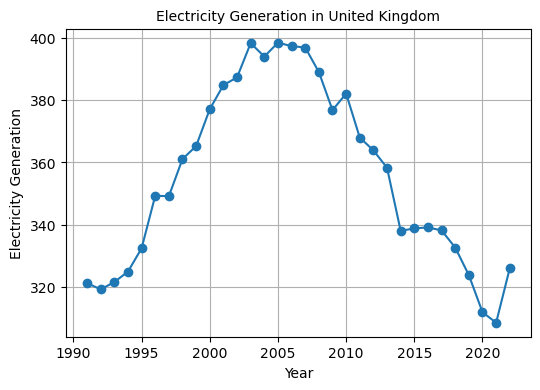

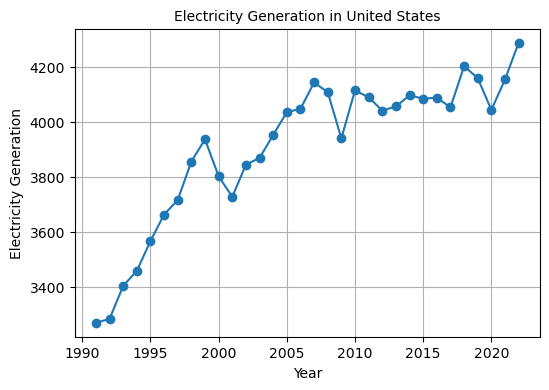

In [62]:
drzavi = ['China', 'Germany', 'India', 'United Kingdom', 'United States']

for country in drzavi:
    df_country = df[df['country'] == country]  # Se razgleduvaat year i electricity generation za konkretna drzava
    plt.figure(figsize=(6, 4))  
    plt.plot(df_country['year'], df_country['electricity_generation'], marker='o', linestyle='-')
    
    plt.title(f'Electricity Generation in {country}', fontsize=10)
    plt.xlabel('Year')
    plt.ylabel('Electricity Generation')
    plt.grid(True)
    
    plt.show()

**Summary & Key Takeaways:** (Insert here)

<br>

***Task 2:** Explore the trend of renewable energy consumption over time in each country*

In [63]:
# df['renewables_consumption']

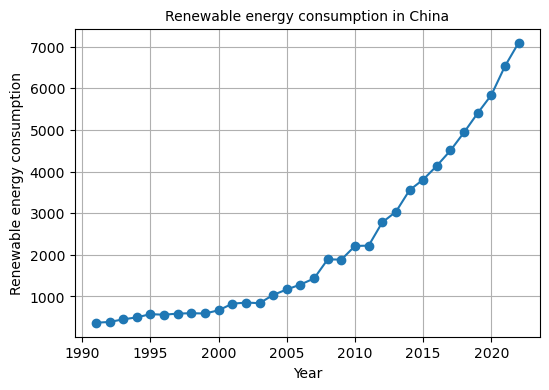

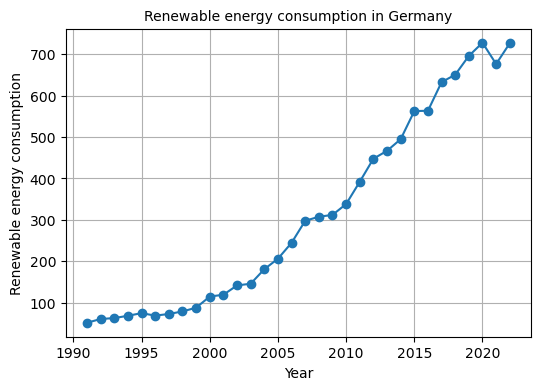

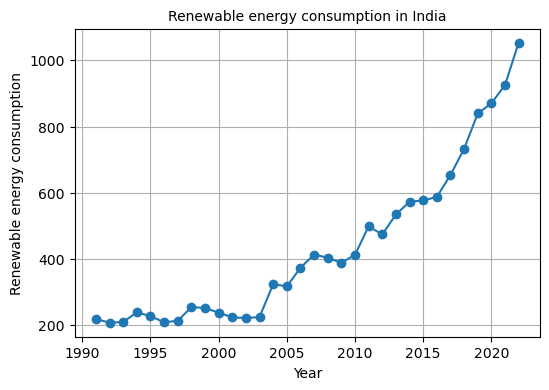

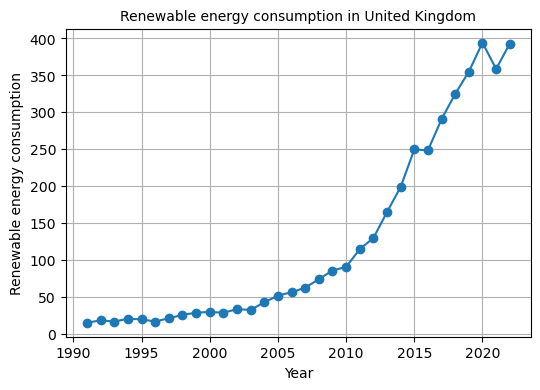

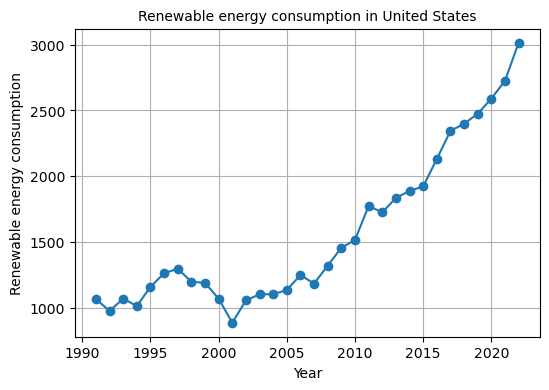

In [64]:
# YOUR CODE HERE
#drzavi = ['China', 'Germany', 'India', 'United Kingdom', 'United States']

for country in drzavi:
    df_country = df[df['country'] == country]  # Se razgleduvaat year i renewable energy consumption za konkretna drzava
    plt.figure(figsize=(6, 4))  
    plt.plot(df_country['year'], df_country['renewables_consumption'], marker='o', linestyle='-')
    
    plt.title(f'Renewable energy consumption in {country}', fontsize=10)
    plt.xlabel('Year')
    plt.ylabel('Renewable energy consumption')
    plt.grid(True)
    
    plt.show()

**Summary & Key Takeaways:** (Insert here)

<br>

***Task 3:** Explore the trend of an arbitrary column in each country*

In [65]:
# df['gas_electricity']

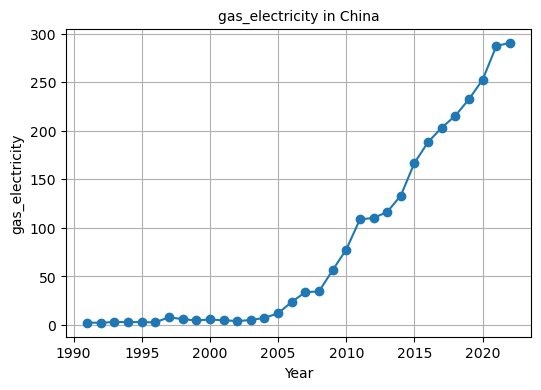

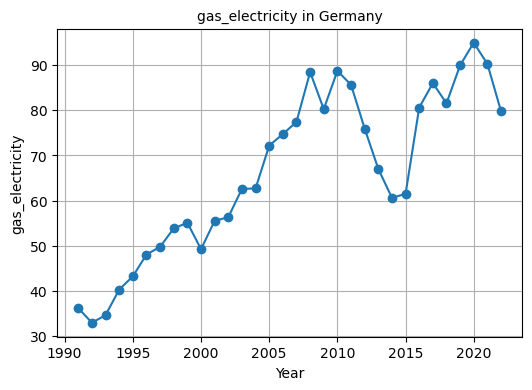

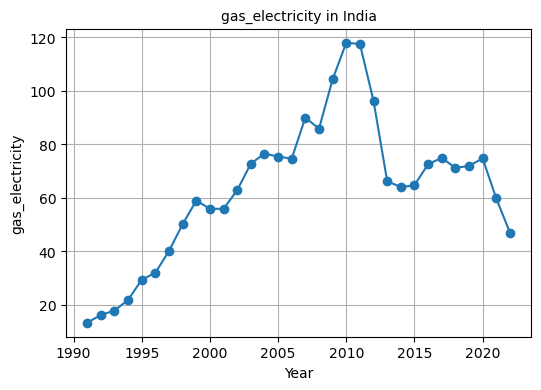

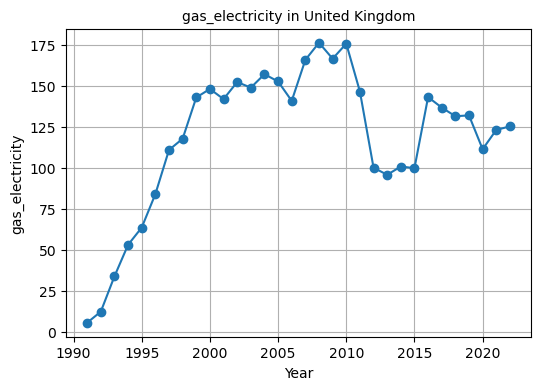

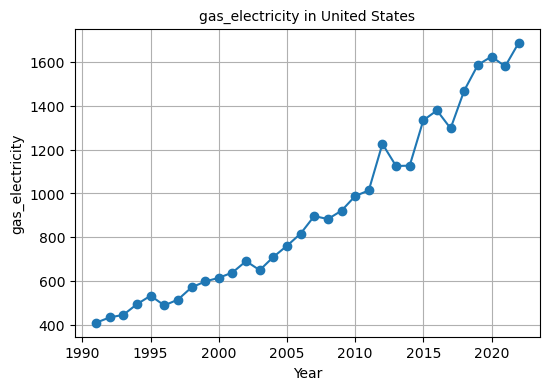

In [66]:
# YOUR CODE HERE
for country in drzavi:
    df_country = df[df['country'] == country]  # Se razgleduvaat year i gas_electricity za konkretna drzava
    plt.figure(figsize=(6, 4))  
    plt.plot(df_country['year'], df_country['gas_electricity'], marker='o', linestyle='-')
    
    plt.title(f'gas_electricity in {country}', fontsize=10)
    plt.xlabel('Year')
    plt.ylabel('gas_electricity')
    plt.grid(True)
    
    plt.show()

**Summary & Key Takeaways:** (Insert here)

<br>

### 6.2 Correlation Analysis
<hr>

***Task 1:** Explore correlation between features. Plot correlation matrix.*

In [67]:
# YOUR CODE HERE
import numpy as np

nn = df.select_dtypes(include=['float64', 'int64']).columns  
correlation_matrix = df[nn].corr()

print(correlation_matrix)


                                year  population       gdp  \
year                        1.000000    0.097927  0.406296   
population                  0.097927    1.000000  0.306330   
gdp                         0.406296    0.306330  1.000000   
electricity_demand          0.427935    0.416072  0.887893   
electricity_generation      0.327511    0.345318  0.945231   
electricity_share_energy    0.769136   -0.140252  0.342349   
carbon_intensity_elec      -0.115762    0.595797 -0.005920   
greenhouse_gas_emissions    0.027758    0.206529  0.470037   
net_elec_imports            0.125837   -0.281344  0.354177   
primary_energy_consumption  0.248995    0.356243  0.952031   
biofuel_consumption         0.328637   -0.180977  0.621503   
biofuel_electricity         0.542621    0.111636  0.681906   
biofuel_share_elec          0.126930   -0.353182 -0.184341   
biofuel_share_energy        0.407647   -0.367346  0.188729   
coal_consumption            0.206703    0.667609  0.669874   
coal_ele

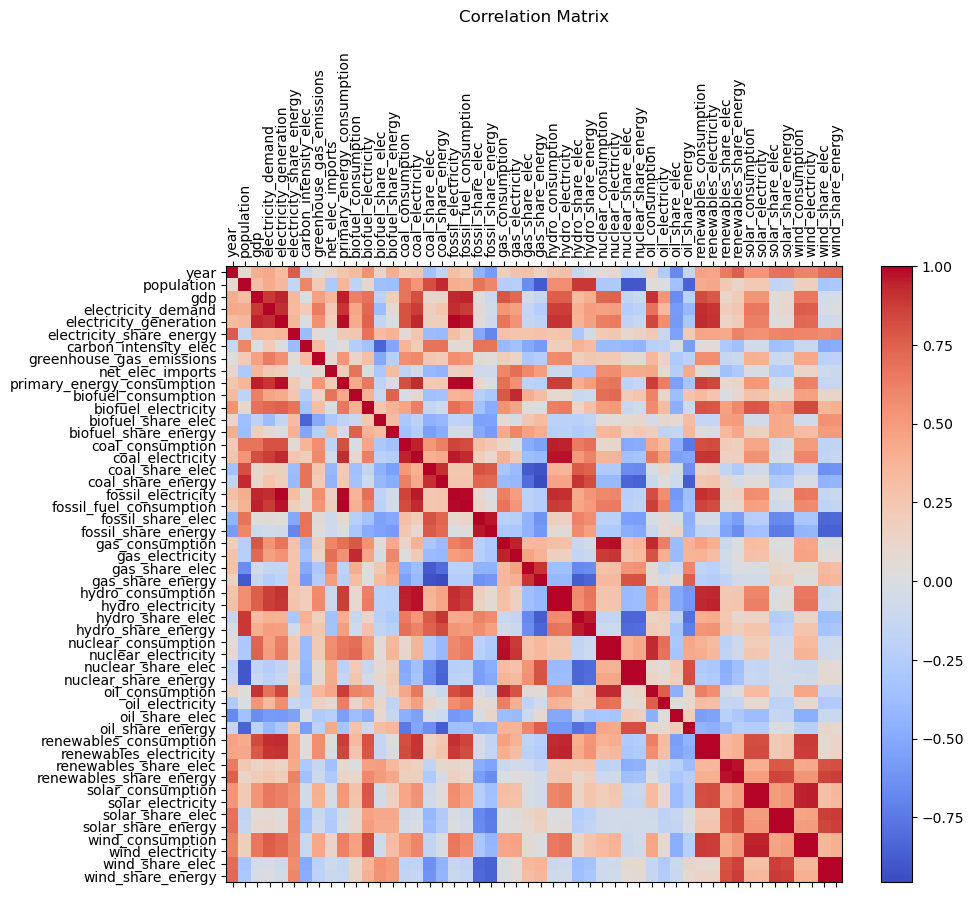

In [80]:
fig, ax = plt.subplots(figsize=(10, 8))

cax = ax.matshow(correlation_matrix, cmap='coolwarm')

plt.colorbar(cax)

ax.set_xticks(np.arange(len(nn)))
ax.set_yticks(np.arange(len(nn)))
ax.set_xticklabels(nn, rotation=90)
ax.set_yticklabels(nn)

plt.title("Correlation Matrix", pad=20)

plt.show()


**Summary & Key Takeaways:** (Insert here)

<br>

***Task 2:** Investigate the correlation between GDP and energy consumption for each of the five countries.*

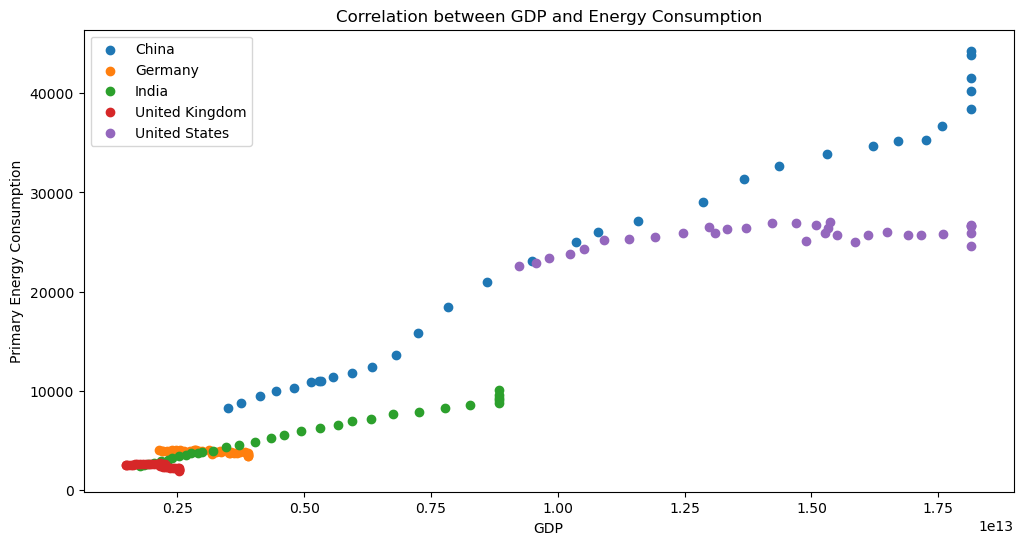

In [81]:
# YOUR CODE HERE
plt.figure(figsize=(12, 6))

for country in drzavi:
    country_data = df[df['country'] == country] # Od kolonata country se zimaat samo podatocite za edna drzava
    plt.scatter(country_data['gdp'], country_data['primary_energy_consumption'], label=country)

plt.xlabel("GDP")
plt.ylabel("Primary Energy Consumption")
plt.title("Correlation between GDP and Energy Consumption")
plt.legend()
plt.show()


**Summary & Key Takeaways:** (Insert here)

<br>

***Task 3:** Investigate the correlation between two features of your choice.*

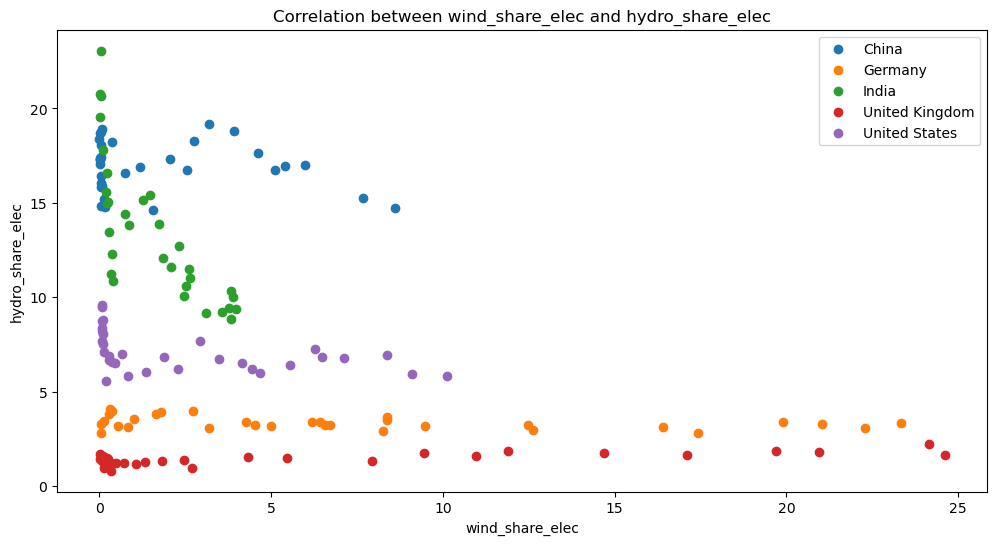

In [70]:
# YOUR CODE HERE
#df['wind_share_elec']
#df['hydro_share_elec']

plt.figure(figsize=(12, 6))

for country in drzavi:
    country_data = df[df['country'] == country]
    plt.scatter(country_data['wind_share_elec'], country_data['hydro_share_elec'], label=country)

# Labels and title
plt.xlabel("wind_share_elec")
plt.ylabel("hydro_share_elec")
plt.title("Correlation between wind_share_elec and hydro_share_elec")
plt.legend()
plt.show()


**Summary & Key Takeaways:** (Insert here)

<br>

### 6.3 Comparative Analysis
<hr>

***Task 1**: Compare the share of renewable fuels in electricity generation across countries.*

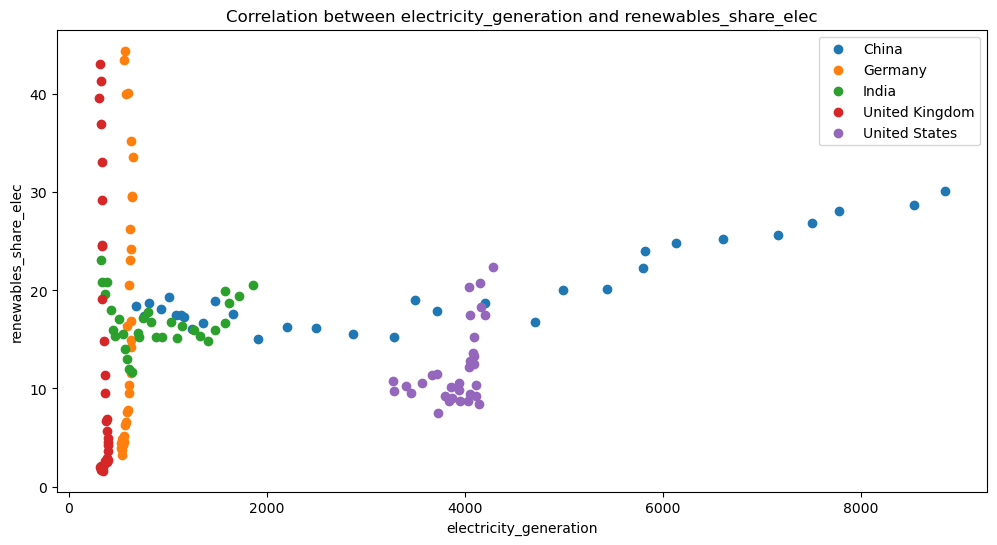

In [83]:
# YOUR CODE HERE
# df['renewables_share_elec']
# df['electricity_generation]

plt.figure(figsize=(12, 6))

for country in drzavi:
    country_data = df[df['country'] == country] # Od kolonata country se zimaat samo podatocite za edna drzava
    plt.scatter(country_data['electricity_generation'], country_data['renewables_share_elec'], label=country)

plt.xlabel("electricity_generation")
plt.ylabel("renewables_share_elec")
plt.title("Correlation between electricity_generation and renewables_share_elec")
plt.legend()
plt.show()


**Summary & Key Takeaways:** (Insert here)

<br>

***Task 2:** Compare generated energy by source for the countries.*

In [84]:
df_filtered = df[df['country'].isin(drzavi)]


In [85]:
energy_sources = [
    'coal_electricity', 'gas_electricity', 'hydro_electricity', 
    'nuclear_electricity', 'oil_electricity', 'renewables_electricity', 
    'solar_electricity', 'wind_electricity'
]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8316\1262477685.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(energy_sources, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8316\1262477685.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(energy_sources, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8316\1262477685.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(energy_sources, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8316\1262477685.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(energy_sources, rotation=

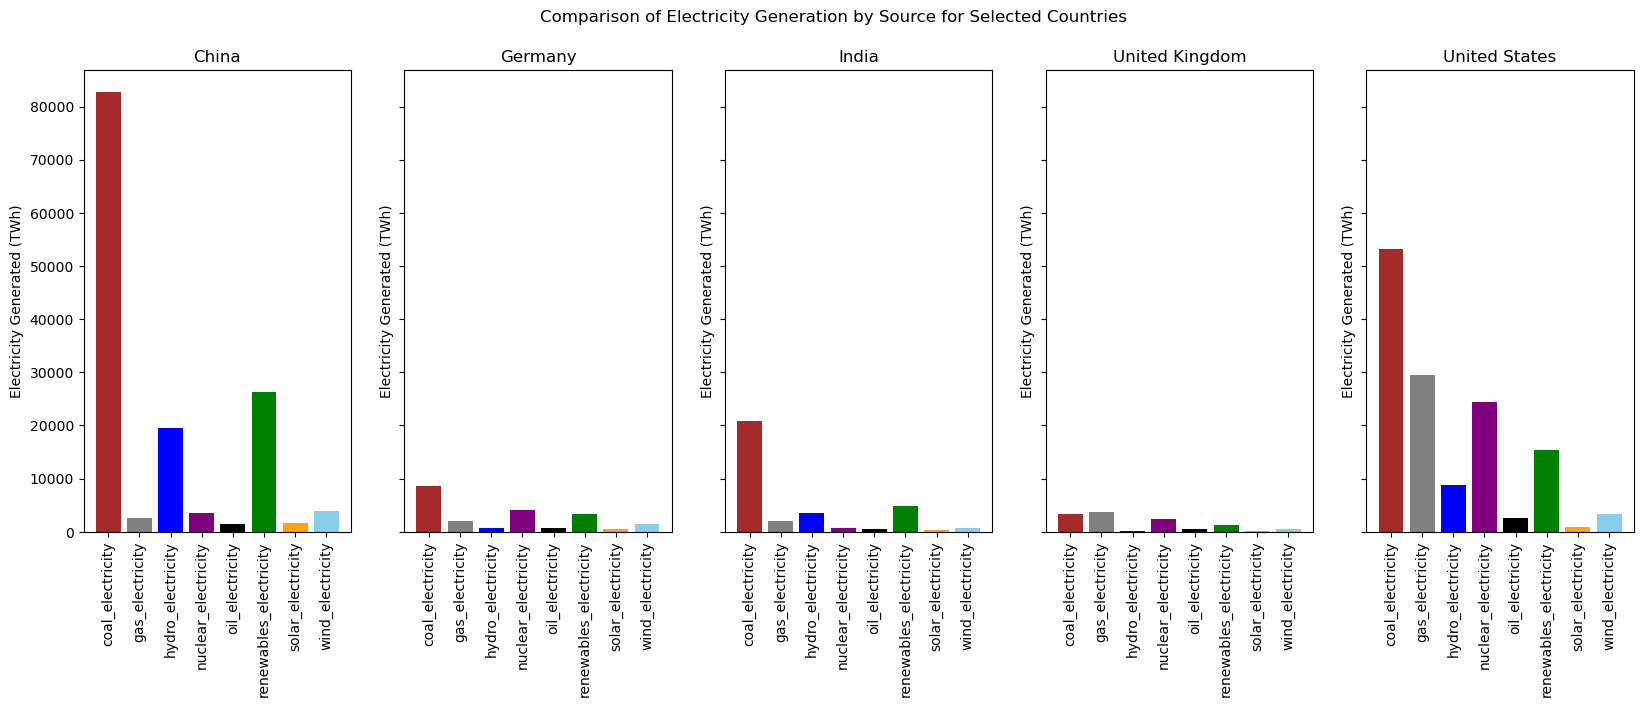

In [86]:
fig, axes = plt.subplots(1, len(drzavi), figsize=(20, 6), sharey=True)

for i, country in enumerate(drzavi):
    df_country = df_filtered[df_filtered['country'] == country]

    energy_values = df_country[energy_sources].sum()
    
    axes[i].bar(energy_sources, energy_values, color=['brown', 'gray', 'blue', 'purple', 'black', 'green', 'orange', 'skyblue'])
    axes[i].set_title(country)
    axes[i].set_xticklabels(energy_sources, rotation=90)
    axes[i].set_ylabel("Electricity Generated (TWh)")

plt.suptitle("Comparison of Electricity Generation by Source for Selected Countries")
plt.show()


**Summary & Key Takeaways:** (Insert here)

<br>

***Task 3:** Compare the five countries by a feature of your choice.*

In [75]:
import numpy as np

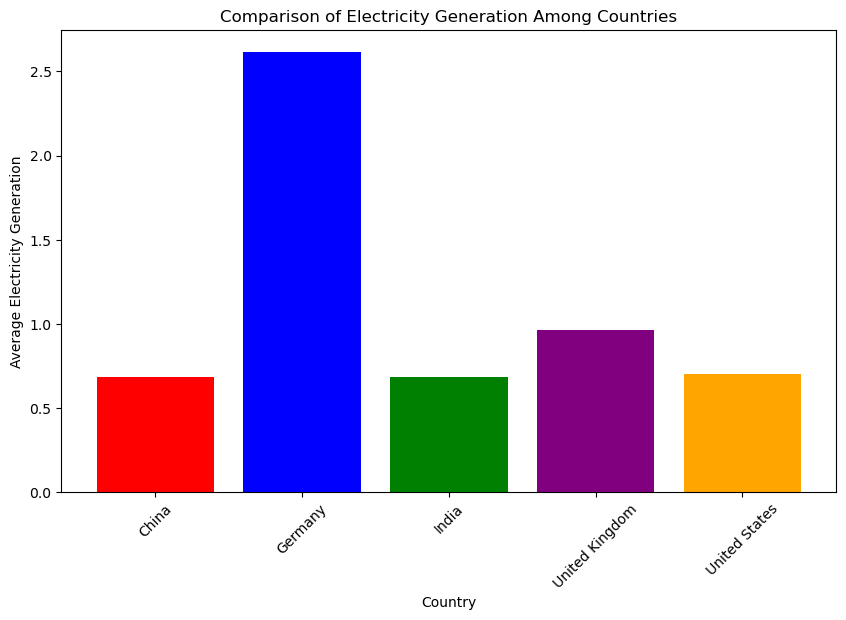

In [87]:
feature = 'solar_share_elec'

avg_values = df[df['country'].isin(drzavi)].groupby('country')[feature].mean()
plt.figure(figsize=(10, 6))
plt.bar(avg_values.index, avg_values.values, color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel("Country")
plt.ylabel("Average Electricity Generation")
plt.title("Comparison of Electricity Generation Among Countries")
plt.xticks(rotation=45)

plt.show()


**Summary & Key Takeaways:** (Insert here)